In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from settings import settings
for k in settings.keys():
    print("Adding " + k + " to namespace")
    globals()[k] = settings[k]

In [2]:
data_path_beta0 = "path/to/beta0/"
data_path_beta0_25 = "path/to/beta0_25/"
data_path_beta0_5 = "path/to/beta0_5/"
data_path_beta0_75 = "path/to/beta0_75/"
data_path_beta1 = "path/to/beta1/"

In [3]:
sorted_lbls = dict()

In [4]:
# load sortings
sorted_lbls_beta0 = dict()
sorted_lbls_beta0["gain_tp"] = np.load(os.path.join(data_path_beta0, "sorted_lbls_LRP_gain_tp.npy"))
sorted_lbls_beta0["area_norm"] = np.load(os.path.join(data_path_beta0, "sorted_lbls_area_norm.npy"))
sorted_lbls_beta0["absolute"] = np.load(os.path.join(data_path_beta0, "sorted_lbls_absolute.npy"))
sorted_lbls["sorted_lbls_beta0"] = sorted_lbls_beta0

In [5]:
# load sortings
sorted_lbls_beta0_25 = dict()
sorted_lbls_beta0_25["gain_tp"] = np.load(os.path.join(data_path_beta0_25, "sorted_lbls_LRP_gain_tp.npy"))
sorted_lbls_beta0_25["area_norm"] = np.load(os.path.join(data_path_beta0_25, "sorted_lbls_area_norm.npy"))
sorted_lbls_beta0_25["absolute"] = np.load(os.path.join(data_path_beta0_25, "sorted_lbls_absolute.npy"))
sorted_lbls["sorted_lbls_beta0_25"] = sorted_lbls_beta0_25

In [6]:
# load sortings
sorted_lbls_beta0_5 = dict()
sorted_lbls_beta0_5["gain_tp"] = np.load(os.path.join(data_path_beta0_5, "sorted_lbls_LRP_gain_tp.npy"))
sorted_lbls_beta0_5["area_norm"] = np.load(os.path.join(data_path_beta0_5, "sorted_lbls_area_norm.npy"))
sorted_lbls_beta0_5["absolute"] = np.load(os.path.join(data_path_beta0_5, "sorted_lbls_absolute.npy"))
sorted_lbls["sorted_lbls_beta0_5"] = sorted_lbls_beta0_5

In [7]:
# load sortings
sorted_lbls_beta0_75 = dict()
sorted_lbls_beta0_75["gain_tp"] = np.load(os.path.join(data_path_beta0_75, "sorted_lbls_LRP_gain_tp.npy"))
sorted_lbls_beta0_75["area_norm"] = np.load(os.path.join(data_path_beta0_75, "sorted_lbls_area_norm.npy"))
sorted_lbls_beta0_75["absolute"] = np.load(os.path.join(data_path_beta0_75, "sorted_lbls_absolute.npy"))
sorted_lbls["sorted_lbls_beta0_75"] = sorted_lbls_beta0_75

In [8]:
# load sortings
sorted_lbls_beta1 = dict()
sorted_lbls_beta1["gain_tp"] = np.load(os.path.join(data_path_beta1, "sorted_lbls_LRP_gain_tp.npy"))
sorted_lbls_beta1["area_norm"] = np.load(os.path.join(data_path_beta1, "sorted_lbls_area_norm.npy"))
sorted_lbls_beta1["absolute"] = np.load(os.path.join(data_path_beta1, "sorted_lbls_absolute.npy"))
sorted_lbls["sorted_lbls_beta1"] = sorted_lbls_beta1

In [9]:
metrics = ["absolute", "area_norm", "gain_tp"]

In [10]:
top = 10

In [11]:
intersection_matrix = np.zeros(shape=(3, 5, 5))

for m_idx, metric in enumerate(metrics):
    for i_idx, i in enumerate(sorted_lbls.keys()):
        for j_idx, j in enumerate(sorted_lbls.keys()):
            intersect = set(sorted_lbls[i][metric][-top:]).intersection(sorted_lbls[j][metric][-top:])
            intersection_matrix[m_idx, i_idx, j_idx] = (len(intersect)/top) * 100

In [13]:
ticks = [0., 0.25, 0.5, 0.75, 1.]

In [14]:
vmin = intersection_matrix.min()
vmax = intersection_matrix.max()

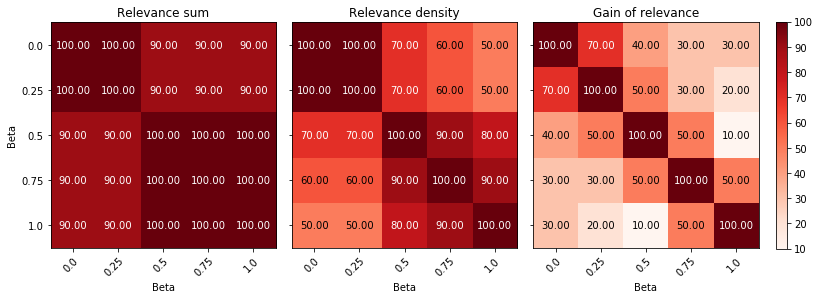

In [68]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fmt = '.2f'
thresh = intersection_matrix.max() * 0.65

# Absolute values
mm = 0
im = ax1.imshow(intersection_matrix[mm], interpolation='nearest', cmap='Reds', vmin=vmin, vmax=vmax)
ax1.set(xticks=np.arange(intersection_matrix[mm].shape[1]),
        yticks=np.arange(intersection_matrix[mm].shape[0]),
        xticklabels=ticks, yticklabels=ticks,
        title="Relevance sum",
        ylabel='Beta',
        xlabel='Beta')
# Rotate the tick labels and set their alignment.
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(intersection_matrix[mm].shape[0]):
    for j in range(intersection_matrix[mm].shape[1]):
        ax1.text(j, i, format(intersection_matrix[mm][i, j], fmt),
                ha="center", va="center",
                color="white" if intersection_matrix[mm][i, j] > thresh else "black")

# Normalized values
mm = 1
im = ax2.imshow(intersection_matrix[mm], interpolation='nearest', cmap='Reds', vmin=vmin, vmax=vmax)
ax2.set(xticks=np.arange(intersection_matrix[mm].shape[1]),
        yticks=np.arange(intersection_matrix[mm].shape[0]),
        xticklabels=ticks, yticklabels=ticks,
        title="Relevance density",
        xlabel='Beta')
# Rotate the tick labels and set their alignment.
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(intersection_matrix[mm].shape[0]):
    for j in range(intersection_matrix[mm].shape[1]):
        ax2.text(j, i, format(intersection_matrix[mm][i, j], fmt),
                ha="center", va="center",
                color="white" if intersection_matrix[mm][i, j] > thresh else "black")

# Normalized values
mm = 2
im = ax3.imshow(intersection_matrix[mm], interpolation='nearest', cmap='Reds', vmin=vmin, vmax=vmax)
ax3.set(xticks=np.arange(intersection_matrix[mm].shape[1]),
        yticks=np.arange(intersection_matrix[mm].shape[0]),
        xticklabels=ticks, yticklabels=ticks,
        title="Gain of relevance",
        xlabel='Beta')
# Rotate the tick labels and set their alignment.
plt.setp(ax3.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(intersection_matrix[mm].shape[0]):
    for j in range(intersection_matrix[mm].shape[1]):
        ax3.text(j, i, format(intersection_matrix[mm][i, j], fmt),
                ha="center", va="center",
                color="white" if intersection_matrix[mm][i, j] > thresh else "black")
        
fig.tight_layout()
fig.subplots_adjust(right=1.05)
cax,kw = mpl.colorbar.make_axes([ax1, ax2, ax3], pad=0.02)
plt.colorbar(im, cax=cax, **kw)

plt.show()
fig.savefig(os.path.join(data_path, "intersection_beta_top10_regions.pdf"), bbox_inches='tight')